<a href="https://colab.research.google.com/github/michelgawron/python_data_analysis/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Downloading the files
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
!unzip avila.zip

--2019-02-15 13:00:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 584600 (571K) [application/zip]
Saving to: ‘avila.zip’

avila.zip           100%[===================>] 570.90K  1.62MB/s    in 0.3s    

2019-02-15 13:01:00 (1.62 MB/s) - ‘avila.zip’ saved [584600/584600]

Archive:  avila.zip
   creating: avila/
  inflating: avila/avila-tr.txt      
  inflating: avila/avila-ts.txt      
  inflating: avila/avila-description.txt  


In [0]:
# First of all we need to read the data from txt files - the read_csv functions allows it even though files are not in csv format
train_data = pd.read_csv('./avila/avila-tr.txt', sep=',', header=None)
test_data = pd.read_csv('./avila/avila-ts.txt', sep=',', header=None)
train_data.head(5), test_data.head(5)

(         0         1         2         3         4         5         6   \
 0  0.266074 -0.165620  0.320980  0.483299  0.172340  0.273364  0.371178   
 1  0.130292  0.870736 -3.210528  0.062493  0.261718  1.436060  1.465940   
 2 -0.116585  0.069915  0.068476 -0.783147  0.261718  0.439463 -0.081827   
 3  0.031541  0.297600 -3.210528 -0.583590 -0.721442 -0.307984  0.710932   
 4  0.229043  0.807926 -0.052442  0.082634  0.261718  0.148790  0.635431   
 
          7         8         9  10  
 0  0.929823  0.251173  0.159345  A  
 1  0.636203  0.282354  0.515587  A  
 2 -0.888236 -0.123005  0.582939  A  
 3  1.051693  0.594169 -0.533994  A  
 4  0.051062  0.032902 -0.086652  F  ,
          0         1         2         3         4         5         6   \
 0 -3.498799  0.250492  0.232070  1.224178 -4.922215  1.145386  0.182426   
 1  0.204355 -0.354049  0.320980  0.410166 -0.989576 -2.218127  0.220177   
 2  0.759828 -1.304042 -0.023991 -0.973663 -0.006417 -0.349509 -0.421580   
 3 -0.005

In [0]:
# Let's rename columns for clarity
columns = ["intercolumnar distance",
"upper margin", 
"lower margin", 
"exploitation", 
"row number", 
"modular ratio", 
"interlinear spacing", 
"weight", 
"peak number", 
"m_ratio/ i_spacing",
"class"]
train_data.columns = columns
test_data.columns = columns
train_data.head(5)

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,m_ratio/ i_spacing,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [0]:
train_data.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,m_ratio/ i_spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [0]:
test_data.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,m_ratio/ i_spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,4.580832,3.213413,11.911338


In [0]:
# Test if our datasets are close to each other or not
train_data.describe() - test_data.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,m_ratio/ i_spacing
count,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000
mean,0.001704,0.030215,-0.005707,-0.005003,0.012735,0.022859,0.003255,0.020582,0.021605,0.001496
std,-0.017120,2.965611,0.127772,0.017084,-0.015822,0.125885,0.346928,0.007076,0.086426,0.014166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.157614,-0.748355,0.000000
25%,0.000000,0.000000,0.000000,-0.001164,0.000000,0.000000,0.000000,0.005717,0.000000,-0.001898
50%,-0.012344,0.007851,0.000000,0.008355,0.000000,0.000000,0.000000,0.008262,0.000000,-0.014116
75%,0.000000,0.000000,-0.003556,0.031002,0.000000,0.000000,0.000000,0.015518,0.000000,0.004551
max,0.000000,366.529812,42.541319,0.000000,0.000000,40.684431,78.098772,8.592249,40.786587,-7.240106


It seems that both our datasets are close to each other: training it on the train data should yield great results over the test set

The question we need to answer is: if they exist, which of the columns can help us tell the difference between two authors?

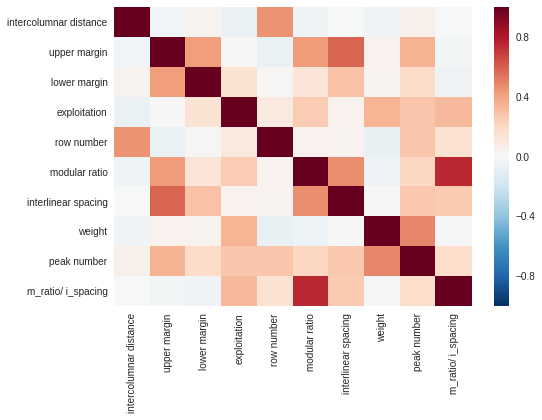

In [0]:
# Print out the correlations between our variables
corr = train_data.corr(method="pearson")
sns.heatmap(corr)

It seems that our variables are not correlated, we are going to keep them all for now

In [0]:
# Separating data in features - targets (x and y)
x = train_data.drop(columns=["class"])
y = train_data["class"]

# Running the feature ranking function on our features
feature_ranking = SelectKBest(k=5)
fmt = '%-8s%-20s%s'
feature_ranking.fit(x, y)
for i, (score, feature) in enumerate(zip(feature_ranking.scores_, x.columns)):
    print(fmt % (i, score, feature))

0       69.364154161064     intercolumnar distance
1       6.4648031925083895  upper margin
2       12.546385854687312  lower margin
3       143.4966501011398   exploitation
4       81.99985336305242   row number
5       91.02632927858829   modular ratio
6       95.62292149631013   interlinear spacing
7       30.03858906826128   weight
8       214.79469083166097  peak number
9       63.520889416727485  m_ratio/ i_spacing


Thanks to this bit of code we can see that the five most intereting features are the peak number, the exploitation, the interlinear spacing, the modular ratio and the row number

In [0]:
# Creating a bunch of data with the 6 best columns only
x_dropped = train_data[["peak number", "exploitation", "interlinear spacing", "modular ratio", "row number", "intercolumnar distance"]]
x_test = test_data.drop(columns=["class"])
x_test_dropped = test_data[["peak number", "exploitation", "interlinear spacing", "modular ratio", "row number", "intercolumnar distance"]]
y_test = test_data["class"]

In [0]:
# Let's first try out a basic logistic regression on the datas with dropped columns
lr_dropped = LogisticRegression()
lr_dropped.fit(x_dropped, y)
lr_dropped.score(x_dropped, y), lr_dropped.score(x_test_dropped, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.511601150527325, 0.5075213183865095)

In [0]:
# Now let's compare it to a model that hasn't columns dropped
lr = LogisticRegression()
lr.fit(x, y)
lr.score(x, y), lr.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.5338446788111217, 0.5307080578710357)

# Trees

### Decision Tree

Now that we tested the regression and that we did not get good results, let's try another type of algorithms: the decision trees. It seems that our training set is more precise when given all the features from the initial dataset. Let's try both entire and column-dropped datasets.

A good description of the library and the algorithm itself can be found [here](https://scikit-learn.org/stable/modules/tree.html#tree).

Let's try and run this algorithm with few different parameters.

In [0]:
depths = [5, 10, 15, 20]
min_samples_leafs = [5, 10, 15, 20]


cols = ["depth", "min_samples_leaf", "accuracy_dropped", "accuracy_dropped_test", "accuracy", "accuracy_test"]
results = []

for depth in depths:
  for min_samples_leaf in min_samples_leafs:
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=101, max_features=None, min_samples_leaf=min_samples_leaf)
    dtree.fit(x, y)
    dtree_dropped = DecisionTreeClassifier(max_depth=depth, random_state=101, max_features=None, min_samples_leaf=min_samples_leaf)
    dtree_dropped.fit(x_dropped, y)
    
    results.append([depth, min_samples_leaf, 
                    dtree_dropped.score(x_dropped, y), dtree_dropped.score(x_test_dropped, y_test),
                    dtree.score(x, y), dtree.score(x_test, y_test)])
    
results_df = pd.DataFrame(results, columns=cols)
results_df

,depth,min_samples_leaf,accuracy_dropped,accuracy_dropped_test,accuracy,accuracy_test
0,5,5,0.589645,0.586567,0.613615,0.603718
1,5,10,0.589645,0.586567,0.613615,0.603718
2,5,15,0.589645,0.586567,0.613615,0.603718
3,5,20,0.589645,0.586567,0.613615,0.604388
4,10,5,0.742282,0.719076,0.835666,0.808566
5,10,10,0.733078,0.711507,0.829914,0.804062
6,10,15,0.722339,0.699722,0.819080,0.792661
7,10,20,0.713327,0.691578,0.806232,0.783079
8,15,5,0.902876,0.862892,0.965580,0.938967
9,15,10,0.857047,0.823896,0.938351,0.912714


#### Results

As we can see above, we yield better results when using all of the features. The "min_samples_leaf" parameter is the minimum number of examples needed for the tree to be forked into two leafs. The lower it is, the better accuracy we get.

We need to be careful to overfitting when using a low number for this parameter. Indeed, when only 5 examples are needed to fork a branch then it is easier for the model to identify specific cases in our dataset, thus overfitting. 

In fact, we can tell that the better model for this dataset is either the 20-5 or 20-10 as we get close results on the test and train set

### Random Forest

We got pretty good results with the decision tree. Now let's try another type of tree to see if we can get better results !

A good description of the library and the algorithm itself can be found [here](https://scikit-learn.org/stable/modules/ensemble.html#forest).

Let's use the same approach we previously used for the decision tree.

In [0]:
n_estimators = [5, 10, 15, 20]
min_samples_leafs = [5, 10, 15, 20]


cols = ["n_estimator", "min_samples_leaf", "accuracy_dropped", "accuracy_dropped_test", "accuracy", "accuracy_test"]
results_rfm = []

for n_estimator in n_estimators:
  for min_samples_leaf in min_samples_leafs:
    rfm = RandomForestClassifier(n_estimators=n_estimator, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf=min_samples_leaf)
    rfm.fit(x, y)
    rfm_dropped = RandomForestClassifier(n_estimators=n_estimator, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf=min_samples_leaf)
    rfm_dropped.fit(x_dropped, y)
    
    results_rfm.append([n_estimator, min_samples_leaf, 
                    rfm_dropped.score(x_dropped, y), rfm_dropped.score(x_test_dropped, y_test),
                    rfm.score(x, y), rfm.score(x_test, y_test)])
    
results_rfm_df = pd.DataFrame(results_rfm, columns=cols)
results_rfm_df

,n_estimator,min_samples_leaf,accuracy_dropped,accuracy_dropped_test,accuracy,accuracy_test
0,5,5,0.937967,0.881575,0.980825,0.962250
1,5,10,0.874209,0.825046,0.948706,0.921912
2,5,15,0.830681,0.791607,0.913902,0.885024
3,5,20,0.798658,0.764683,0.887440,0.860975
4,10,5,0.955609,0.904858,0.988686,0.974801
5,10,10,0.898754,0.853406,0.964909,0.946632
6,10,15,0.845829,0.810099,0.936050,0.910990
7,10,20,0.804698,0.773115,0.908341,0.881384
8,15,5,0.959348,0.906870,0.988591,0.974897
9,15,10,0.900863,0.854843,0.967018,0.947207


#### Results

As seen before, we yield better results when using all the features that we have. The problem of overfitting also appears for this algorithm but when using a small number of features we got great results while reducing overfitting.

We can say that the safest model to use to prevent overfitting is the 5-10.

As we found that both two algorithms yield great results, we can tell that our analysis is satisfying. We could have tried several other algorithms, such as Deep Learning ones, but they need a high computing power, and it seems that our actual results are hard to improve.